# Car Insurance Prediction - Mini Project

## 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

sns.set(style="whitegrid")


## **2**. Load Dataset

In [ ]:
train = pd.read_csv("carInsurance_train.csv")
test = pd.read_csv("carInsurance_test.csv")

print("Train Shape:", train.shape)
print("Test Shape:", test.shape)

Train Shape: (4000, 19)
Test Shape: (1000, 19)


In [ ]:
train.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


## 3. Exploratory Data Analysis

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

In [ ]:
train.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [ ]:
train.isnull().sum()

,0
Id,0
Age,0
Job,19
Marital,0
Education,169
Default,0
Balance,0
HHInsurance,0
CarLoan,0
Communication,902


In [ ]:
print("Target Distribution (Train):")
print(train['CarInsurance'].value_counts(normalize=True))

Target Distribution (Train):
CarInsurance
0    0.599
1    0.401
Name: proportion, dtype: float64


In [ ]:
print("\nMissing Values (Train):")
print(train.isnull().sum())


Missing Values (Train):
Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64


In [ ]:
print("\nMissing Values (Test):")
print(test.isnull().sum())


Missing Values (Test):
Id                     0
Age                    0
Job                    5
Marital                0
Education             47
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        221
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome              757
CallStart              0
CallEnd                0
CarInsurance        1000
dtype: int64


## 4. Data Cleaning

In [ ]:
cols_to_drop = ['Id', 'CallStart', 'CallEnd', 'Outcome']
train.drop(columns=cols_to_drop, inplace=True)
test.drop(columns=cols_to_drop, inplace=True)

In [ ]:
for col in ['Job', 'Education', 'Communication']:
    train[col].fillna("unknown", inplace=True)
    test[col].fillna("unknown", inplace=True)

/tmp/ipython-input-13-1172192948.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna("unknown", inplace=True)
/tmp/ipython-input-13-1172192948.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

## 5. Feature Engineering - One-Hot Encoding

In [ ]:
train_encoded = pd.get_dummies(train, drop_first=True)
test_encoded = pd.get_dummies(test, drop_first=True)

In [ ]:
X_train = train_encoded.drop("CarInsurance", axis=1)
y_train = train_encoded["CarInsurance"]

In [ ]:
test_encoded['CarInsurance'] = 0
X_test = test_encoded.drop("CarInsurance", axis=1)

In [ ]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

## 6. Train-Test Split and Scaling

In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_val = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## 7. Train Logistic Regression

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_tr, y_tr)

LogisticRegression(max_iter=1000)

## 8. Model Evaluation

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

Confusion Matrix:
[[408  76]
 [159 157]]


In [ ]:
print("\nClassification Report:")
print(classification_report(y_val, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.84      0.78       484
           1       0.67      0.50      0.57       316

    accuracy                           0.71       800
   macro avg       0.70      0.67      0.67       800
weighted avg       0.70      0.71      0.70       800



## 9. Feature Importance

In [ ]:
coefficients = model.coef_[0]
features = X_train.columns

In [ ]:
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': coefficients
}).sort_values(by='Importance', key=lambda x: abs(x), ascending=False)

In [ ]:
print("Top 10 Important Features:")
print(importance_df.head(10))

Top 10 Important Features:
                  Feature  Importance
26  Communication_unknown   -0.513473
6            NoOfContacts   -0.311742
3             HHInsurance   -0.279274
27   LastContactMonth_aug   -0.223997
23     Education_tertiary    0.198647
35   LastContactMonth_nov   -0.175257
30   LastContactMonth_jan   -0.170303
8            PrevAttempts    0.160914
33   LastContactMonth_mar    0.151143
36   LastContactMonth_oct    0.142428


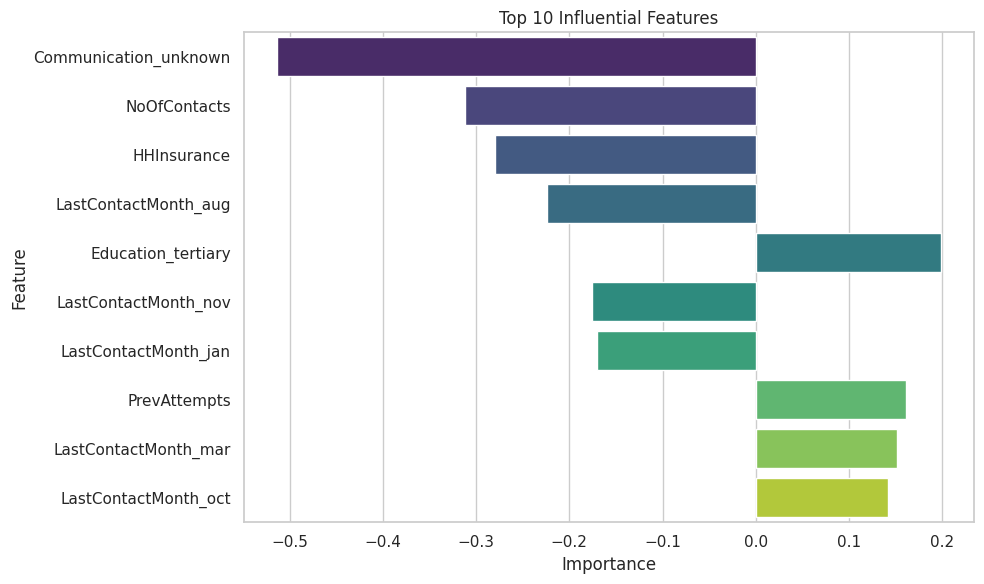

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Influential Features")
plt.tight_layout()
plt.show()

## 10. Predictions on Test Set

In [ ]:
test['CarInsurance_Predicted'] = model.predict(X_test_scaled)
test[['CarInsurance_Predicted']].to_csv("carInsurance_predictions.csv", index=False)
print("Predictions saved to 'carInsurance_predictions.csv'")

Predictions saved to 'carInsurance_predictions.csv'
